d_barrier:  1e-13
y = T2/2T1 =  1.75
U_m =  4.0625
n0*U_m =  10.15625
t_d =  1.0000000000000003e-13
n_avg:  7.604166666666669
TM: 
 [[ 1.91827668+0.25808877j -0.92361470-0.19023215j]
 [-0.92361470+0.19023215j  1.91827668-0.25808877j]]
Tp: (1.91827668262+0.258088765604j)  ---  1.93556070481
Tm: (-0.923614699038+0.190232154438j)  ---  0.943001794729
[ 1.91827668+0.25808877j -0.92361470+0.19023215j]
Populating the interactive namespace from numpy and matplotlib


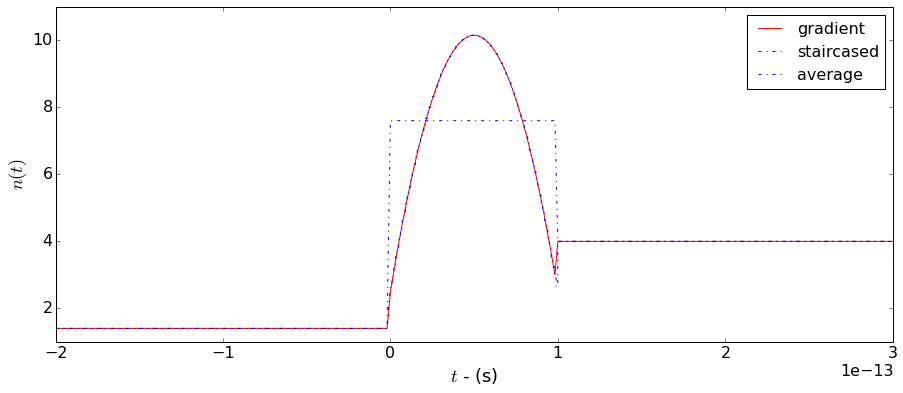

In [1]:
%reload_ext autoreload
%autoreload

import numpy as np
from scipy import constants
from Electromagnetics.TMM import *

freq = 1.0*constants.tera
l_0 = 1/freq
k_0 = 2.0*np.pi*freq/constants.c

pc = TMM_EM_N_Time(k_0)
pc_avg = TMM_EM_N_Time(k_0)    ## multilayer replaced with an average homogenius slab

d_barrier = l_0/10.0
n_0, n_1 = 1.4, 4.0
print('d_barrier: ', d_barrier)

y_barrier = 1.75
conv = -1
s1 = -1.0*conv
s2 = 1.0*conv

n0_barrier = 2.5
n_layer = 100

n_p, d_p = pc.StaircaseGradientBarrier1D(n0_barrier, y_barrier, d_barrier, s1, s2, n_layer)

n_grad_layer = 1
n_p, d_p = pc.RepeatProfile(n_p, d_p, n_grad_layer)


pc.SetupMultilayer(n_0, n_1, n_p, d_p)

from Electromagnetics.GMTM import GMTM1D_T
import math

gmtm = GMTM1D_T()
gmtm.SetProfileParameters(n0_barrier, y_barrier, d_barrier, s1, s2, vbose=True)
gmtm.SetMediumParams(n_grad_layer, n_0, n_1)


n_avg = n0_barrier*gmtm.GetUIntegral(0.0, d_barrier)/d_barrier
print('n_avg: ', n_avg)
pc_avg.SetupMultilayer(n_0, n_1, [n_avg], [n_grad_layer*d_barrier])

TM = pc.GetTMTotal()
print('TM: \n', TM)

Tp, Tm = pc.GetTransmissionPlusMinus()

print('Tp:', Tp, ' --- ', abs(Tp))
print('Tm:', Tm, ' --- ', abs(Tm))

print(TM.dot(np.array([1.0, 0.0])))

plot_TMM = True
plot_AVG = True

%pylab inline

d_sides = d_barrier*2.0
n_pts_0, n_pts_1 = 100, 100
n_pts_i = 60
[t_pts, n_vec] = pc.GetMediumPlot(n_pts_0, n_pts_i, n_pts_1, d_sides, d_sides)
[t_pts_gm, n_vec_gm] = gmtm.GetMediumPlot(n_pts_0, n_pts_i, n_pts_1, d_sides, d_sides)
[t_pts_avg, n_vec_avg] = pc_avg.GetMediumPlot(n_pts_0, n_pts_i, n_pts_1, d_sides, d_sides)
            

figsize(15, 6)

fig = figure()
plot(t_pts_gm, np.real(n_vec_gm), 'r', label='gradient')
if plot_TMM:
    plot(t_pts, np.real(n_vec), 'b-.', label='staircased')
    
if plot_AVG:
    plot(t_pts_avg, np.real(n_vec_avg), 'b-.', label='average')

xlabel('$t$ - (s)', fontsize=18)
ylabel('$n(t)$', fontsize=18)
legend(loc='best', fontsize=16)

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)


#ax = gca()
#ax.text(-d_sides, n_1*0.9, r'$y={}$'.format(y_barrier))
#ax.text(-d_sides, n_1*0.6, r'$E(z) forward$', color='red')
#ax.text(-d_sides, n_1*0.4, r'$E(z) backward$', color='blue')


import os
cwd = os.getcwd()
dir_name = os.path.join(cwd, 'other', 'gradient', 'test-2')
file_ext = '.png'
if not os.path.exists(dir_name):
    os.makedirs(dir_name)

file_name = os.path.join(dir_name, 'profile'+file_ext)
savefig(file_name)


Populating the interactive namespace from numpy and matplotlib
k_th: 588279.9367955773    k__0: 58827.99367955773      k__1: 2353119.747182309
k_one =  1593715.4854424251


/usr/lib/python3/dist-packages/numpy/core/numeric.py:460: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


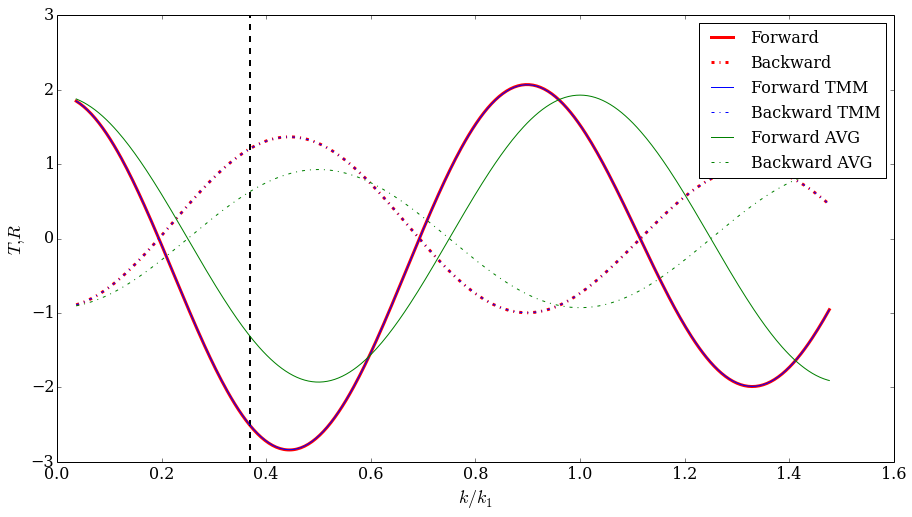

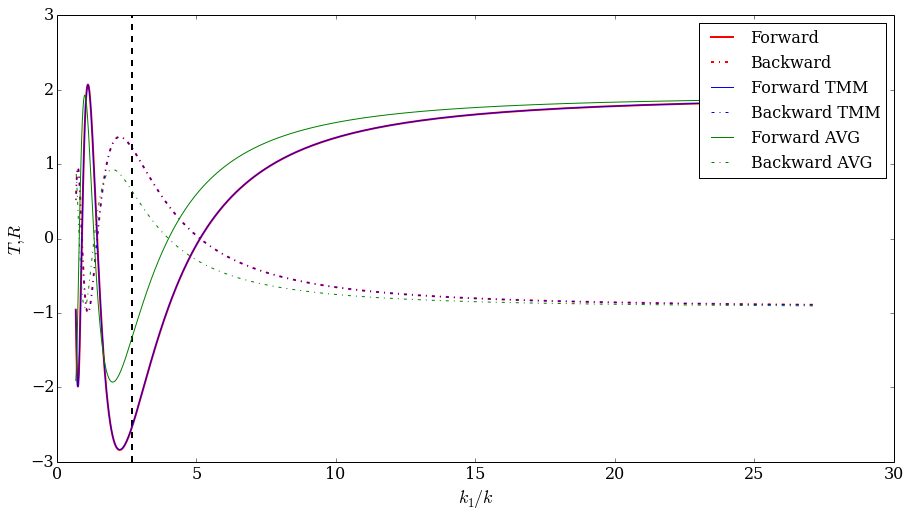

In [2]:
%pylab inline


k_th = gmtm.GetTransitionK()
k__1 = 4.0*k_th
k__0 = k_th/10.0
print('k_th: {}    k__0: {}      k__1: {}'.format(k_th, k__0, k__1))

k_one = 2.0*math.pi/d_barrier/constants.c*n_avg
print('k_one = ', k_one)

N = 400

figsize(15, 8)

k, Tp, Tm = gmtm.GetTransmissionPlusMinus(k__0, k__1, N)

plot(k/k_one, Tp, 'r', linewidth=3, label='Forward')
plot(k/k_one, Tm, 'r-.', linewidth=3, label='Backward')

axvline(x=k_th/k_one, linewidth=2, linestyle='--', color='k')

if plot_TMM:
    k, Tp, Tm = pc.GetTransmissionPlusMinusKBand(k__0, k__1, N)
    plot(k/k_one, Tp, 'b', label='Forward TMM')
    plot(k/k_one, Tm, 'b-.', label='Backward TMM')

if plot_AVG:
    k, Tp, Tm = pc_avg.GetTransmissionPlusMinusKBand(k__0, k__1, N)
    plot(k/k_one, Tp, 'g', label='Forward AVG')
    plot(k/k_one, Tm, 'g-.', label='Backward AVG')
    

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)

xlabel('$k/k_{1}$', fontsize=18)
ylabel('$T, R$', fontsize=18)
legend(loc='best', fontsize=16)

savefig(os.path.join(dir_name, 'TransRefl-1'+file_ext))

show()

k, Tp, Tm = gmtm.GetTransmissionPlusMinus(k__0, k__1, N)

plot(k_one/k, Tp, 'r', linewidth=2, label='Forward')
plot(k_one/k, Tm, 'r-.', linewidth=2, label='Backward')

axvline(x=k_one/k_th, linewidth=2, linestyle='--', color='k')

if plot_TMM:
    k, Tp, Tm = pc.GetTransmissionPlusMinusKBand(k__0, k__1, N)
    plot(k_one/k, Tp, 'b', label='Forward TMM')
    plot(k_one/k, Tm, 'b-.', label='Backward TMM')

if plot_AVG:
    k, Tp, Tm = pc_avg.GetTransmissionPlusMinusKBand(k__0, k__1, N)
    plot(k_one/k, Tp, 'g', label='Forward AVG')
    plot(k_one/k, Tm, 'g-.', label='Backward AVG')
    

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)

xlabel('$k_{1}/k$', fontsize=18)
ylabel('$T, R$', fontsize=18)
legend(loc='best', fontsize=16)

savefig(os.path.join(dir_name, 'TransRefl-2'+file_ext))


Populating the interactive namespace from numpy and matplotlib


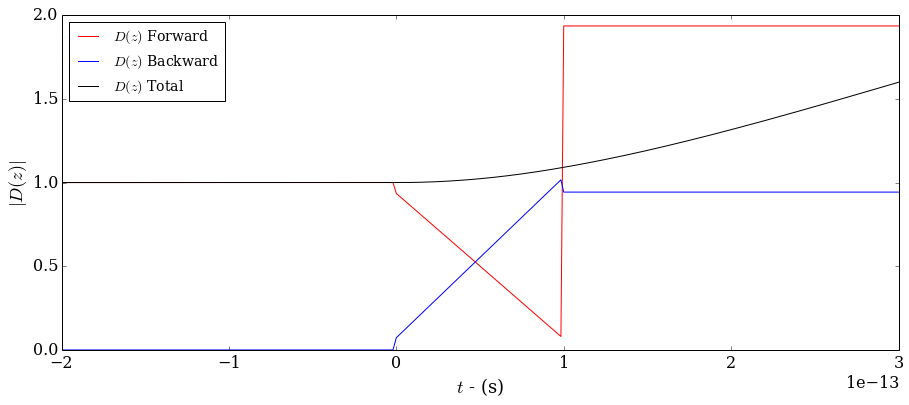

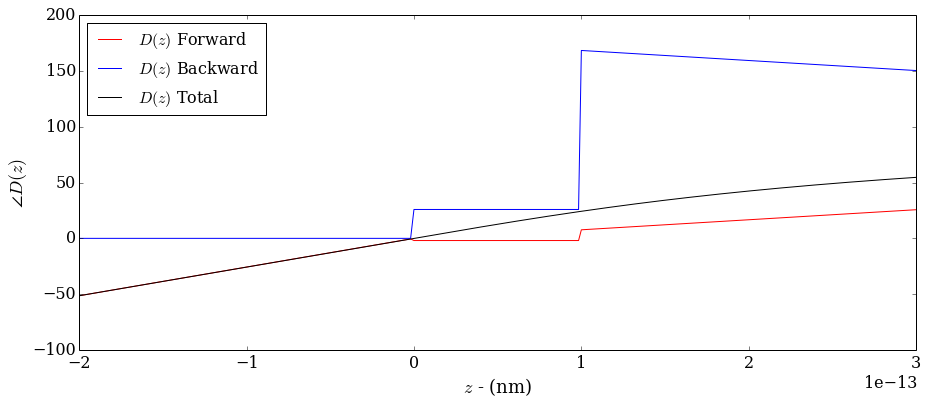

In [3]:
%pylab inline

           
figsize(15, 6)

[t_pts, E_FWD, E_BWD] = gmtm.GetFieldPlot(k_0, n_pts_0, n_pts_i, n_pts_1, d_sides, d_sides)
plot(t_pts, np.abs(E_FWD), 'r', label='$D(z)$ Forward')
plot(t_pts, np.abs(E_BWD), 'b', label='$D(z)$ Backward')
plot(t_pts, np.abs(E_FWD+E_BWD), 'k', label='$D(z)$ Total')

plot_TMM = False
if plot_TMM:
    [t_pts, E_FWD, E_BWD] = pc.GetFieldPlot(n_pts_0, n_pts_i, n_pts_1, d_sides, d_sides)
    plot(t_pts, np.abs(E_FWD), 'r-.')
    plot(t_pts, np.abs(E_BWD), 'b-.')
    plot(t_pts, np.abs(E_FWD+E_BWD), 'k-.')

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)

xlabel('$t$ - (s)', fontsize=18)
ylabel('$|D(z)|$', fontsize=18)
legend(loc='best', fontsize=14)

savefig(os.path.join(dir_name, 'E_mag' + file_ext))

show()

[t_pts, E_FWD, E_BWD] = gmtm.GetFieldPlot(k_0, n_pts_0, n_pts_i, n_pts_1, d_sides, d_sides)
plot(t_pts, np.angle(E_FWD, deg=True), 'r', label='$D(z)$ Forward')
plot(t_pts, np.angle(E_BWD, deg=True), 'b', label='$D(z)$ Backward')
plot(t_pts, np.angle(E_FWD+E_BWD, deg=True), 'k', label='$D(z)$ Total')


if plot_TMM:
    [t_pts, E_FWD, E_BWD] = pc.GetFieldPlot(n_pts_0, n_pts_i, n_pts_1, d_sides, d_sides)
    plot(t_pts, np.angle(E_FWD, deg=True), 'r-.')
    plot(t_pts, np.angle(E_BWD, deg=True), 'b-.')
    plot(t_pts, np.angle(E_FWD+E_BWD, deg=True), 'k-.')

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)

xlabel('$z$ - (nm)', fontsize=18)
ylabel('$\\angle D(z)$', fontsize=18)
legend(loc='best', fontsize=16)

savefig(os.path.join(dir_name, 'E_phase' + file_ext))
show()
